In [66]:
import numpy as np
import pandas as pd
import warnings # 경고 메시지 무시
warnings.filterwarnings(action='ignore')
# 한국어 형태소 분석기 중 성능이 가장 우수한 Mecab 사용
from konlpy.tag import Mecab
mecab = Mecab()
from tqdm import tqdm # 작업 프로세스 시각화
import re # 문자열 처리를 위한 정규표현식 패키지
from gensim import corpora # 단어 빈도수 계산 패키지
import gensim # LDA 모델 활용 목적
import pyLDAvis # LDA 시각화용 패키지
from collections import Counter # 단어 등장 횟수 카운트
from gensim.models.coherencemodel import CoherenceModel

/home/user_1/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.sparse as sparse
import random
import implicit
from implicit.als import AlternatingLeastSquares as ALS

# %cd /home/user_3/medistream-recsys/Script
# from preprocessing import drop_columns,dict_to_column,dict_to_set,set_to_column,key_to_element

pd.set_option('display.max_rows', 300)
pd.set_option('display.max_columns', 100)

/home/user_1/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [65]:
model = pd.read_csv('/home/user_1/medistream-recsys-private/data/CBF/cosine.csv')

/home/user_1/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [89]:
list(model[model['title']=='우리 아이 감기'].iloc[0][1:].sort_values(ascending=False)[1:].index)

['감기란 무엇인가? 왜 이견이 생길까?',
 '감기의 정의',
 'HAPPY 소아청소년 진료',
 '감기의 자연경과',
 '소아 의료를 바꿔 나갑시다',
 '아이의 관점으로 보겠습니다',
 '감기와 항생제',
 '불명열을 줄이기 위한 외래 발열 진료가이드',
 '아빠가 들려주는 일차진료 소아과학',
 '보수교육 초과평점 다음해에 쓸 수 있나요?',
 '[신향화의 핵심 소아과 상식] 0. 프롤로그 - 한의사에게 소아과 지식이 필요한 이유',
 '열도 없고 콧물도 없는데 기침과 노란 가래가 있는 14년생 여아 처방을 어떤식으로 쓰면 좋을까요?',
 '수유 중인 산무에게서 유두 짓무름이 발생하면 어떻게 치료해야 할까?',
 '영유아 아토피 이유식을 어떻게 안내해야 할까요?',
 '감기약의 효과',
 '열패혈증염증',
 '스마트 소아진료매뉴얼 절판 되었습니다.',
 '옥병풍산(玉屛風散)의 방해',
 '감기는 위험한 질환인가?',
 'SMART 소아진료매뉴얼 3판',
 "'한방소아과'가 궁금한 분들을 위한 인터뷰",
 '평주온열경위',
 '소아피부질환해설',
 '비뇨기질환의 한방치료',
 '기본통증진료학',
 '[MZ가 읽는 한의학] 캄포의학을 공부하는 초짜 한의사를 위한 안내서',
 '신종바이러스 감염증 예방과 치료를 위한 한방진료전략',
 '동의보감 약선',
 '한방처방정석',
 '증보운곡본초학.1',
 '증보운곡본초학',
 '내과 한방진료',
 '한방치료 44철칙',
 '한방 활용 가이드',
 '기침과 누런 가래에 형개연교탕과 소청룡탕',
 '안면신경과 안면마비',
 '사상의학[병증편]',
 '최신 간학',
 '소화기질환과 장내 미생물',
 '항생제를 조기에 끊으면 내성균이 생긴다는 근거는 어디에서 구할 수 있을까요?',
 '이것만 알면 할 수 있는 치과한방치료',
 '마행의감탕 증례1 - 발바닥의 대형 사마귀(족저사마귀)',
 '초음파 가이드 근골격계 통증 치료의 정석',
 '통증백해(痛症百解)',
 '길익동동',
 '근골격계 약침의학',
 '[MZ가 읽는 한

# 1. Load Data

data/CBF 폴더에서 정제된 파일들을 불러온다.

In [30]:
vectors = pd.read_json("../../data/CBF/final_tokens_2.json")

/home/user_1/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [31]:
df1 = pd.read_json('../../data/CBF/df_book_clean.json')
df = df1.copy()
df.shape

/home/user_1/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(372, 15)

In [32]:
df2 = pd.read_json('../../data/CBF/article_sum.json')
df2 = df2.copy()
df2.shape

/home/user_1/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(3438, 5)

In [33]:
df_des = pd.concat([df['description'],df2['content_tag_removed']])
df_des = pd.concat([df[['name_x','description']].rename(columns={'name_x':'title'}),df2[['title','content_tag_removed']].rename(columns={'content_tag_removed':'description'})], axis=0)
df_des = df_des.reset_index().reset_index().rename(columns={'level_0':'문서 번호'})

/home/user_1/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [34]:
df_des

/home/user_1/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,문서 번호,index,title,description
0,0,0,KCD 한방내과 진찰진단 가이드라인,의 번째 큐레이션 상시판매 권승원의 한방내과 진찰진단 가이드라인 의학은빠른속...
1,1,1,우리 아이 감기,우리 아이 감기부제 약물 남용과 과잉치료가 없는 새로운 감기 진료를 목표로 ...
2,2,2,통증치료를 위한 신경초음파와 하이드로다이섹션 테크닉,_ 출판사 리뷰년전 소수 인원이 모여 시작한 통증 공부 모임이 작은 불씨가 ...
3,3,3,의사들이 꼭 알고 있어야 하는 응급의학 실전지침서(1-2),의사들이 꼭 알고 있어야 하는 응급의학 실전지침서
4,4,4,복부 초음파 정석,_ 저자서문 초음파 검사는 임상 영역에서 청진기로 불릴 정도로 간편한...
...,...,...,...,...
3805,3805,3433,"[나의 인턴 일지] Ep.04 한의대생, 퇴사를 했다.",선생님들 안녕하세요! 꽤 오랜만에 글을 씁니다. 저 퇴사를 했습...
3806,3806,3434,초음파 케이스: shoulder impingement synd. (SASD burs...,# CASE 13 houlder iigeet yd. SASD uriti 37...
3807,3807,3435,비판적으로 논문 읽기: 통계적 보정에 대해,"얼마 전 COVID-19를 앓고 난 뒤 남아 있는 여러 증상들, 롱 코비드Log ..."
3808,3808,3436,[작가가 입사했다] Ep.09 작가가.. 혹사했다..,"여름 휴가 기간은 쏜살같이 지났고, 여전히 메디스트림은 바쁘다. 엎친데 덮..."


# 2. Tokenize

형태소 토큰화  
책의 description 과 아티클의 content의 내용을 형태소 분석기를 통해서 명사 추출

형태소 분석기 : Etri API, Mecab 사용  
Mecab을 통해서 명사를 추출하고
Etri API 를 통해서 명사들의 단어사전을 만들어 분석한다.

In [8]:
#################################################################################
from gensim import corpora, models, similarities

/home/user_1/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [9]:
des_tokenized = []
for doc in tqdm(df_des['description']):
    tokens = [token for token in mecab.nouns(doc) if len(token) > 1] # 각 행(책,아티클)마다의 형태소 분석 명사 추출
    des_tokenized.append(tokens)

len(des_tokenized)

/home/user_1/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
100%|██████████| 3810/3810 [00:23<00:00, 160.78it/s]


3810

In [10]:
entri_token = []
for doc in vectors['tokens']:
    entri_token.append(doc)
len(entri_token)

/home/user_1/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


3810

In [11]:
from gensim import corpora
dictionary = corpora.Dictionary(entri_token) # 명사 집합들 사전화
corpus = [dictionary.doc2bow(text) for text in des_tokenized] # 각 문서마다 각 명사의 갯수 분석
print(corpus[3000])

/home/user_1/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0, 1), (1, 5), (9, 1), (20, 1), (33, 1), (35, 3), (38, 1), (41, 1), (44, 5), (48, 3), (50, 1), (53, 2), (58, 1), (62, 1), (66, 1), (73, 1), (81, 1), (82, 6), (85, 4), (90, 4), (94, 6), (120, 1), (146, 7), (165, 1), (177, 1), (178, 1), (183, 1), (188, 2), (202, 1), (211, 1), (216, 1), (238, 2), (241, 2), (260, 2), (312, 1), (322, 1), (357, 2), (360, 1), (421, 3), (425, 1), (435, 1), (437, 5), (480, 2), (497, 6), (500, 1), (539, 1), (546, 2), (559, 1), (560, 12), (565, 2), (577, 1), (703, 1), (751, 1), (768, 1), (775, 1), (847, 1), (858, 6), (861, 1), (871, 1), (906, 3), (945, 6), (959, 1), (971, 1), (989, 1), (990, 2), (1075, 2), (1088, 1), (1302, 1), (1349, 1), (1505, 1), (1607, 1), (1616, 1), (1623, 1), (1697, 1), (1790, 2), (1937, 1), (1949, 1), (1953, 2), (1999, 1), (2072, 3), (2112, 1), (2180, 1), (2230, 2), (2257, 1), (2361, 1), (2608, 2), (2690, 1), (2880, 3), (3002, 1), (3032, 1), (3047, 1), (3128, 24), (3191, 1), (3492, 2), (3685, 2), (3723, 1), (3737, 4), (3927, 1), (4222, 1

## 2.1 형태소 사전 분석

In [35]:
# dictionary item 확인
from itertools import islice
def take(n, iterable):
    return list(islice(iterable, n))
items_5 = take(5, dictionary.iteritems())
items_5

/home/user_1/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0, '가이드'), (1, '검사'), (2, '경험'), (3, '교수'), (4, '구성')]

In [36]:
print('Number of unique tokens: %d' % len(dictionary)) # 사전내 유니크한 형태소 수
print('Number of articles: %d' % len(corpus)) 

Number of unique tokens: 14554
Number of articles: 3810


/home/user_1/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [37]:
# description에 나온 사전 속 단어 수
def tokenization_report(bow, article_number):
    # 선택한 문서의 단어 묶음 가져오기
    article_tokens = bow[article_number]
    # 해당 단어 묶음, 출현 빈도에 따라 sort
    sorted_tokens = sorted(article_tokens, key=lambda x: x[1], reverse=True)
    
    for i in range(len(bow[article_number])):
        print("Word {} (\"{}\") appears {} time(s).".format(sorted_tokens[i][0], 
                                                         dictionary[sorted_tokens[i][0]], 
                                                         sorted_tokens[i][1]))
tokenization_report(corpus, 0)

Word 12400 ("한의사") appears 10 time(s).
Word 31 ("임상") appears 9 time(s).
Word 6 ("근거") appears 7 time(s).
Word 10 ("내용") appears 7 time(s).
Word 285 ("시간") appears 7 time(s).
Word 94 ("환자") appears 6 time(s).
Word 1 ("검사") appears 5 time(s).
Word 2 ("경험") appears 4 time(s).
Word 36 ("진료") appears 4 time(s).
Word 38 ("진찰") appears 4 time(s).
Word 48 ("필요") appears 4 time(s).
Word 49 ("하나") appears 4 time(s).
Word 50 ("한방") appears 4 time(s).
Word 304 ("확인") appears 4 time(s).
Word 435 ("한약") appears 4 time(s).
Word 8 ("기록") appears 3 time(s).
Word 11 ("노력") appears 3 time(s).
Word 18 ("배치") appears 3 time(s).
Word 25 ("시행") appears 3 time(s).
Word 33 ("정리") appears 3 time(s).
Word 35 ("진단") appears 3 time(s).
Word 44 ("치료") appears 3 time(s).
Word 53 ("혈액") appears 3 time(s).
Word 344 ("서술") appears 3 time(s).
Word 582 ("직관") appears 3 time(s).
Word 666 ("현장") appears 3 time(s).
Word 1133 ("필자") appears 3 time(s).
Word 3451 ("승원") appears 3 time(s).
Word 0 ("가이드") appears 2 time(s).
Wor

/home/user_1/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## 2.2 Mecab과 Etri API 단어 관계

In [43]:
set_tokens_entri = []
for tokens in entri_token:
    for token in tokens:
        set_tokens_entri.append(token)
set(set_tokens_entri)
set_tokens_des = []
for tokens in des_tokenized:
    for token in tokens:
        set_tokens_des.append(token)
set(set_tokens_des)
set_tokens_entri

/home/user_1/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['한방',
 '내과',
 '진찰',
 '진단',
 '가이드',
 '라인',
 '큐레이션',
 '상시',
 '판매',
 '한방',
 '내과',
 '진찰',
 '진단',
 '가이드',
 '라인',
 '의학',
 '은빠',
 '른속',
 '도로',
 '변화',
 '추구',
 '의사',
 '의학',
 '내과',
 '교수',
 '의책',
 '책한',
 '구절',
 '구성',
 '한의',
 '진심',
 '혈액',
 '검사',
 '영상',
 '검사',
 '시행',
 '전꼭',
 '필요',
 '검사',
 '시행',
 '필요',
 '병력',
 '청취',
 '진찰',
 '제공',
 '노력',
 '방약',
 '합편',
 '근래',
 '발표',
 '임상',
 '참고',
 '서적',
 '내용',
 '노력',
 '선배',
 '경험',
 '기록',
 '하나',
 '하나',
 '근거',
 '최근',
 '발표',
 '논문',
 '치료',
 '내용',
 '정리',
 '스트셀러',
 '진료',
 '필수',
 '배치',
 '진료',
 '아이',
 '감기',
 '아이',
 '감기부제',
 '약물',
 '남용',
 '과잉',
 '치료',
 '감기',
 '진료',
 '목표',
 '안녕',
 '도서',
 '소개',
 '아이',
 '감기',
 '도서',
 '임상',
 '활용',
 '원장',
 '인터뷰',
 '진행',
 '구입',
 '목표',
 '원장',
 '제품',
 '구매',
 '동기',
 '원장',
 '의원',
 '환자',
 '절반',
 '정도',
 '소아',
 '소아',
 '진료',
 '관련',
 '부분',
 '구매',
 '의료',
 '기관',
 '의원',
 '소아',
 '진료',
 '빈도',
 '중요',
 '부분',
 '감기',
 '기침',
 '중이',
 '축농',
 '제목',
 '보고',
 '생각',
 '목표',
 '처음',
 '구입',
 '마음',
 '동기',
 '결과',
 '원장',
 '관련',
 '서적',
 '양방',
 '소아',
 '교과',
 '내용',
 '정리',
 '진료',
 '도움

In [61]:
# 원래 단어사전에 포함된 단어 갯수
len(dictionary)

/home/user_1/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


14554

### Mecab에서 단어 분류는 되었지만 etri 단어사전에 포함안된 단어들

In [46]:
len(set(set_tokens_des) - set(set_tokens_entri)),set(set_tokens_des) - set(set_tokens_entri)

/home/user_1/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(27071,
 {'관악산',
  '整腸',
  '穴位',
  '장시간',
  '검안서',
  '嘔渴',
  '볼드체',
  '삼음경',
  '적도',
  '저염식',
  '동정맥류',
  '定義',
  '준일',
  '복수초',
  '圖說',
  '교학',
  '막대기',
  '綱領',
  '측연',
  '극기',
  '견배',
  '강간',
  '프리모',
  '수면욕',
  '기술학',
  '팔자걸음',
  '半夏',
  '단변',
  '섬서',
  '益脾',
  '고분화',
  '長頭',
  '조황',
  '扶南',
  '喉頭',
  '熱水',
  '寒厥',
  '인권',
  '오른심방',
  '소작',
  '돌고래',
  '상핵',
  '시몬',
  '행자',
  '어투',
  '우반구',
  '복고주의',
  '박상동',
  '복령보심탕',
  '기저체',
  '폐동',
  '본수',
  '서취',
  '원주민',
  '기주',
  '플라스민',
  '醫學',
  '寒傷',
  '再考',
  '鑛物',
  '은선',
  '蟲害',
  '실베',
  '한동수',
  '高句麗',
  '교도소',
  '위인전',
  '셜록',
  '침학',
  '정희재',
  '中樞',
  '테라스',
  '칫솔',
  '동동',
  '豆豉',
  '日華',
  '프레슨',
  '김연섭',
  '제만',
  '술부',
  '일직선',
  '보여',
  '去毒',
  '무모증',
  '藥名',
  '곽유화',
  '아이언',
  '國醫',
  '제와',
  '저담',
  '우측면',
  '장하림',
  '라임',
  '횡격막',
  '通寶',
  '노권',
  '여법',
  '鬱血',
  '우편물',
  '적자생존',
  '소득세',
  '레사',
  '돌변',
  '후열',
  '삼합',
  '최원충',
  '짝짓기',
  '항병',
  '코미',
  '임산물',
  '무증상',
  '완두콩',
  '막성',
  '기연',
  '無根',
  '東西',
  '토력',
  

### etri 단어사전에는 등록되었지만 Mecab에서 단어 분류가 안된 단어들

In [47]:
len(set(set_tokens_entri) - set(set_tokens_des)),set(set_tokens_entri) - set(set_tokens_des)

/home/user_1/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(5529,
 {'사례가',
  '예찬식탐',
  '진피의염증',
  '부통증',
  '건보추',
  '의어',
  '족궁',
  '시호가망초탕',
  '수필',
  '변증론치',
  '복진',
  '디스크구',
  '치료료',
  '가많',
  '죄송',
  '우황청',
  '밑칸',
  '손저림',
  '불금',
  '피셜',
  '명중',
  '연추나',
  '과긴장',
  '상부위장',
  '청진상',
  '우완통',
  '차의',
  '이펙',
  '유사제',
  '맹검',
  '육모',
  '고실내',
  '건강냥',
  '에통증',
  '복강천자',
  '분조무사이',
  '생모려',
  '사역산',
  '위워크',
  '요상',
  '엑스제',
  '샘염',
  '증상숨',
  '성폐',
  '별따기',
  '한의자보',
  '한선염',
  '망음병',
  '근이완',
  '제요추',
  '반하탕',
  '공약침',
  '달동안',
  '큰마름근',
  '척추후',
  '역류증',
  '백굴',
  '안정자',
  '근육통방',
  '년전',
  '지방산아미노산',
  '창피함',
  '상하검',
  '지연월경',
  '겸증',
  '세탁셀',
  '육울',
  '확인리스트',
  '초기실증',
  '저색소',
  '흥분전파',
  '수핵',
  '부분견',
  '임플란트',
  '한무당',
  '굽쇠',
  '후만',
  '쌕쌕',
  '어혈약',
  '핫팩뜸',
  '콧줄',
  '삼술침',
  '골반저',
  '측만',
  '바이오시밀러',
  '좌슬부',
  '외품',
  '확성',
  '마탕',
  '미황니맥',
  '요중',
  '술이',
  '퇴골',
  '여일',
  '과굴곡',
  '주한언',
  '감초돈',
  '유착선',
  '쭉빼',
  '온경탕',
  '발살바',
  '인가요',
  '주소주',
  '저측굴곡',
  '천식끼',
  '직하방',
  '퍼증가',
  '얼마못',
  '셀프로',
  '발음성',
  '학번역',

### 실제 단어사전에서 사용된 단어 갯수

In [55]:
len(set(set_tokens_entri)) - len(set(set_tokens_entri) - set(set_tokens_des))

/home/user_1/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


9025

## 결론 : etri와 Mecab을 같이 사용함으로써 더 정제된 단어사전을 쉽고 빠르게 만들 수 있었다.

# 3. Determining Optimal Topic Number
주제별 토픽 갯수 선택 - 그리드 서치

In [62]:
topicnums = [1,5,10,15,20,25,30,35,40,45,50]
project_folder = '../../data/CBF/'

ldamodels_bow = {}
for i in topicnums:
    random.seed(42)
    if not os.path.exists(project_folder+'/models6/ldamodels_bow_'+str(i)+'.lda'):
        %time ldamodels_bow[i] = models.LdaModel(corpus, num_topics=i, random_state=42, update_every=1, passes=10, id2word=dictionary,minimum_probability=0.01)
        ldamodels_bow[i].save(project_folder+'/models6/ldamodels_bow_'+str(i)+'.lda')
        print('ldamodels_bow_{}.lda created.'.format(i))
    else: 
        print('ldamodels_bow_{}.lda already exists.'.format(i))

ldamodels_bow_1.lda already exists.
ldamodels_bow_5.lda already exists.
ldamodels_bow_10.lda already exists.
ldamodels_bow_15.lda already exists.
ldamodels_bow_20.lda already exists.
ldamodels_bow_25.lda already exists.
ldamodels_bow_30.lda already exists.
ldamodels_bow_35.lda already exists.
ldamodels_bow_40.lda already exists.
ldamodels_bow_45.lda already exists.
ldamodels_bow_50.lda already exists.


/home/user_1/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [17]:
import pickle
lda_topics = {}
for i in topicnums:
    lda_model = models.LdaModel.load(project_folder+'/models6/ldamodels_bow_'+str(i)+'.lda')
    lda_topics_string = lda_model.show_topics(i)
    #'0.037*"치료" + 0.022*"신경" + 0.021*"시술" + 0.018*"경우" + 0.017*"환자" + 0.016*"손상" + 0.016*"골절" + 0.016*"약침" + 0.015*"통증" + 0.012*"도침"'
    # 위 내용 정리
    lda_topics[i] = ["".join([c if c.isalpha() else " " for c in topic[1]]).split() for topic in lda_topics_string]

pickle.dump(lda_topics,open(project_folder+'/models6/pub_lda_bow_topics.pkl','wb'))

/home/user_1/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# coherences, perplexities

|--|Perplexity|Topic Coherence|
|--|--|--|
|의미|확률 모델이 결과를 얼마나 정확하게 예측하는지.낮을수록 정확하게 예측.|토픽이 얼마나 의미론적으로 일관성 있는지.높을수록 의미론적 일관성 높음|
|주용도|동일 모델 내 파라미터에 따른 성능 평가할 때 주로 사용|해당 모델이 얼마나 실제로 의미있는 결과를 내는지|
|한계|Perplexity가 낮다고 해서, 결과가 해석 용이하다는 의미가 아님|평가를 진행하기 위해 다른 외부 데이터(코퍼스, 시소러스 등)가 필요|

In [18]:
coherences=[]
perplexities=[]
passes=[]
for i in topicnums:
    lda_model = models.LdaModel.load(project_folder+'/models6/ldamodels_bow_'+str(i)+'.lda')
    cm = CoherenceModel(model=lda_model, corpus=corpus, coherence='u_mass')
    coherence = cm.get_coherence()

    coherences.append(coherence)
    perplexities.append(lda_model.log_perplexity(corpus))
    print("Cpherence",coherence)
    print('Perplexity: ', lda_model.log_perplexity(corpus),'\n\n')
    

/home/user_1/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Cpherence -0.7146464438417615
Perplexity:  -7.442251313917082 


Cpherence -1.0015728516701246
Perplexity:  -7.117507762310223 


Cpherence -1.2576459628826446
Perplexity:  -7.039066387594315 


Cpherence -1.441573831733796
Perplexity:  -7.048779440017253 


Cpherence -1.5192425681117254
Perplexity:  -7.054411050164184 


Cpherence -1.7034844311916586
Perplexity:  -7.054572381240857 


Cpherence -1.7733919558303095
Perplexity:  -7.06114711328682 


Cpherence -1.5757846233353245
Perplexity:  -7.079992430443916 


Cpherence -1.7667201893098703
Perplexity:  -7.085316368703548 


Cpherence -1.7851524942873391
Perplexity:  -7.108022267386553 


Cpherence -2.1267770700805086
Perplexity:  -7.131362965585505 




/home/user_1/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


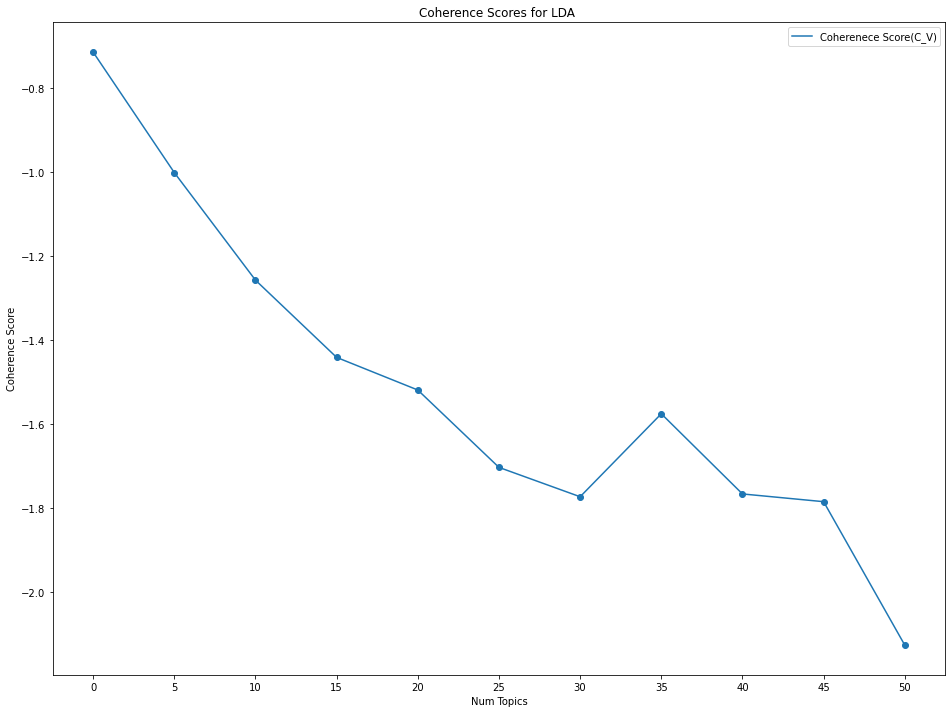

In [19]:
coherence_list = coherences
label = "Coherenece Score(C_V)"

x = range(0, 51, 5)
plt.figure(figsize=(16, 12))
plt.xticks(x)
plt.plot(x, coherence_list, label=label)
plt.scatter(x, coherence_list)
plt.title(f"Coherence Scores for LDA ")
plt.xlabel("Num Topics")
plt.ylabel("Coherence Score")
plt.legend(loc='best')
plt.show()

/home/user_1/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


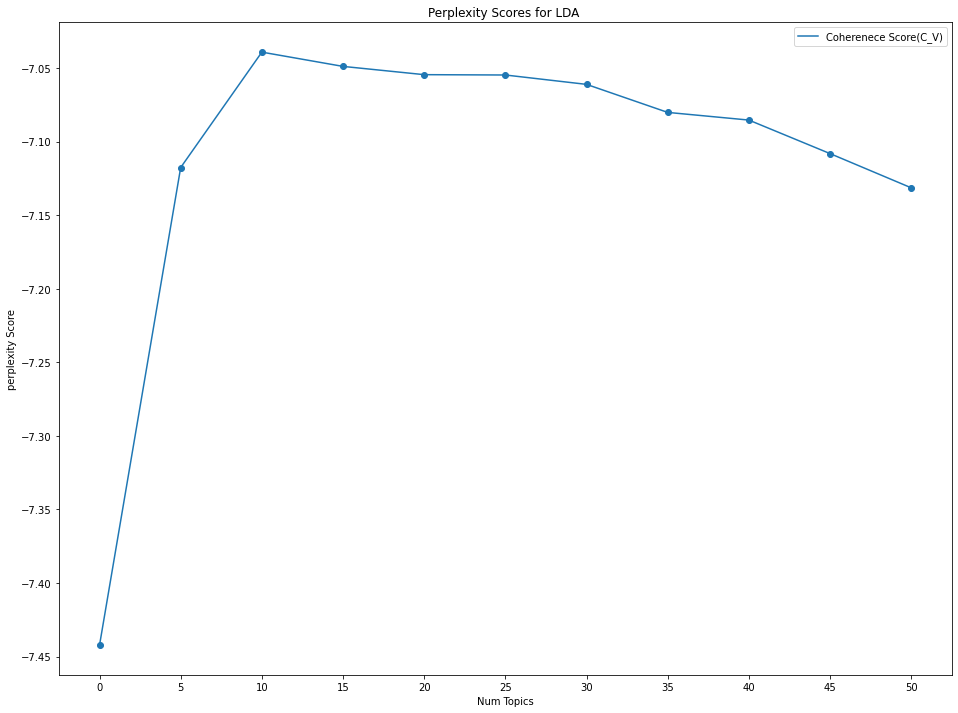

In [20]:
perplexity_list = perplexities
label = "Coherenece Score(C_V)"

x = range(0, 51, 5)
plt.figure(figsize=(16, 12))
plt.xticks(x)
plt.plot(x, perplexity_list, label=label)
plt.scatter(x, perplexity_list)
plt.title(f"Perplexity Scores for LDA ")
plt.xlabel("Num Topics")
plt.ylabel("perplexity Score")
plt.legend(loc='best')
plt.show()

## 자카드 유사도

In [21]:
def jaccard_similarity(query, document):
    intersection = set(query).intersection(set(document))
    union = set(query).union(set(document))
    return float(len(intersection))/float(len(union))

/home/user_1/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [22]:
lda_stability = {}
for i in range(0,len(topicnums)-1):
    jacc_sims = []
    for t1,topic1 in enumerate(lda_topics[topicnums[i]]):
        sims = []
        for t2,topic2 in enumerate(lda_topics[topicnums[i+1]]):
            sims.append(jaccard_similarity(topic1,topic2))    
        jacc_sims.append(sims)    
    lda_stability[topicnums[i]] = jacc_sims
    
pickle.dump(lda_stability,open(project_folder+'/models6/pub_lda_bow_stability.pkl','wb'))

/home/user_1/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/home/user_1/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


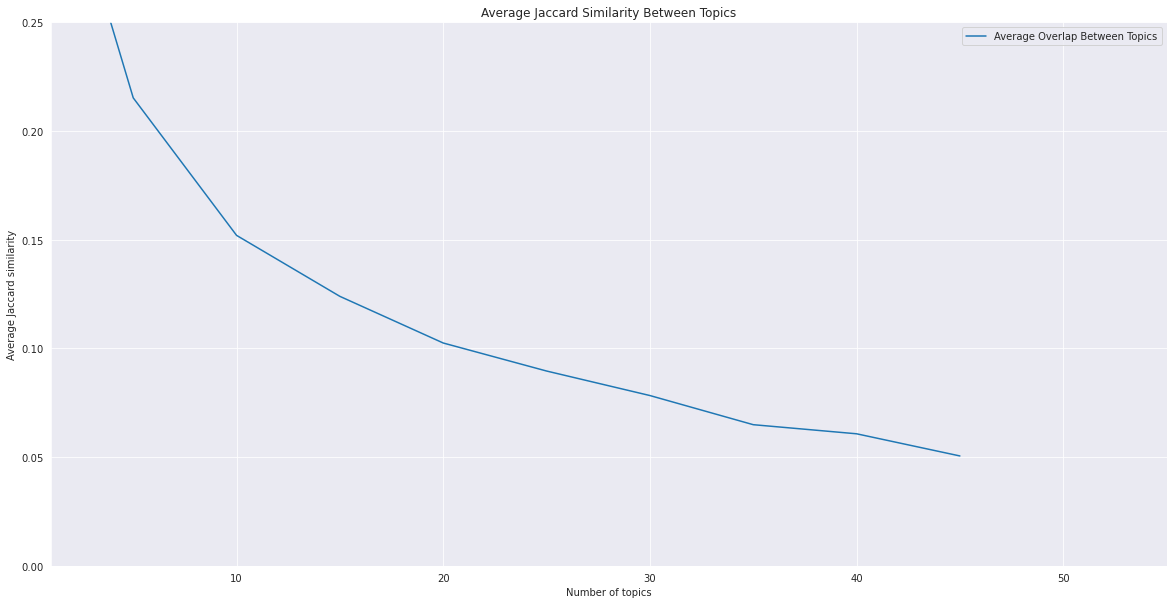

In [23]:
lda_stability = pickle.load(open(project_folder+'/models6/pub_lda_bow_stability.pkl','rb'))
mean_stability = [np.array(lda_stability[i]).mean() for i in topicnums[:-1]]

with sns.axes_style("darkgrid"):
    x = topicnums[:-1]
    y = mean_stability
    plt.figure(figsize=(20,10))
    plt.plot(x,y,label='Average Overlap Between Topics')
    plt.xlim([1, 55])
    plt.ylim([0, 0.25])
    plt.xlabel('Number of topics')
    plt.ylabel('Average Jaccard similarity')   
    plt.title('Average Jaccard Similarity Between Topics')
    plt.legend()    
    plt.show()

# 4. Model 사용

Topic 선택 threshold : minimum_probability (float, optional) – Topics with a probability lower than this threshold will be filtered out.

In [63]:
# Coherence score가 높아지고, Perpelxity score가 낮은 35개의 topic 을 선택한다.
num_topics = 35
lda_model_final = models.LdaModel.load(project_folder+'/models6/ldamodels_bow_'+str(num_topics)+'.lda')

/home/user_1/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [25]:
# 토픽별 포함된 단어 표시
from pprint import pprint
top_topics = lda_model_final.top_topics(corpus, topn=10)

avg_topic_coherence = sum([t[1] for t in top_topics]) / num_topics
print('Average topic coherence: %.4f.' % avg_topic_coherence)

counter = 0
for topic in top_topics:
    print('Topic {}:'.format(counter))
    counter += 1
    pprint(topic)
    
pickle.dump(lda_topics,open(project_folder+'/models6/pub_lda_bow_topics.pkl','wb'))

/home/user_1/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Average topic coherence: -1.3565.
Topic 0:
([(0.028029878, '처방'),
  (0.022417061, '증상'),
  (0.017461188, '한방'),
  (0.015395121, '생각'),
  (0.013712564, '치료'),
  (0.013494522, '의학'),
  (0.0134670595, '한약'),
  (0.013205063, '사용'),
  (0.012839564, '사람'),
  (0.01267821, '경우')],
 -0.6127859723670805)
Topic 1:
([(0.029167572, '관절'),
  (0.028124547, '치료'),
  (0.026628487, '무릎'),
  (0.022705115, '수술'),
  (0.022166058, '손상'),
  (0.022129524, '통증'),
  (0.020895755, '환자'),
  (0.019677116, '경우'),
  (0.014101438, '운동'),
  (0.013950022, '출처')],
 -0.8282885750199375)
Topic 2:
([(0.059770156, '통증'),
  (0.022834562, '경우'),
  (0.021677252, '증상'),
  (0.01841211, '발생'),
  (0.018058972, '부위'),
  (0.015646731, '염증'),
  (0.012751685, '원인'),
  (0.012164128, '진단'),
  (0.010413871, '질환'),
  (0.010149339, '관절')],
 -0.8688459372741731)
Topic 3:
([(0.01833644, '온병'),
  (0.01575971, '변증'),
  (0.014388867, '기혈'),
  (0.012594788, '사기'),
  (0.010764592, '상한'),
  (0.010434921, '이것'),
  (0.010287928, '경우'),
  (0.00999573

In [26]:
# 각 아티클마다 토픽 배분
corpus_lda_model = lda_model_final[corpus]
for article in corpus_lda_model[0]:
    print(article)

(1, 0.35779223)
(10, 0.017463023)
(14, 0.19861303)
(20, 0.050068643)
(21, 0.064981505)
(22, 0.034152612)
(24, 0.15160364)
(29, 0.115135625)


/home/user_1/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [27]:
from operator import itemgetter
index_high_corr_list = []

index_counter = 0

for article in corpus_lda_model:
    highest_feature = max(article, key=itemgetter(1))[0]
    max_correlation = max(article, key=itemgetter(1))[1]
    index_high_corr_list.append([index_counter, highest_feature, max_correlation])
    index_counter += 1

index_high_corr_list[:5]

/home/user_1/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[[0, 1, 0.35780838],
 [1, 11, 0.36908692],
 [2, 17, 0.6179745],
 [3, 14, 0.80570054],
 [4, 33, 0.5564428]]

In [44]:
# df_des[df_des.index==99]

/home/user_1/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## 아티클(책) 별 선택된 주제의 확률값 그래프화

/home/user_1/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


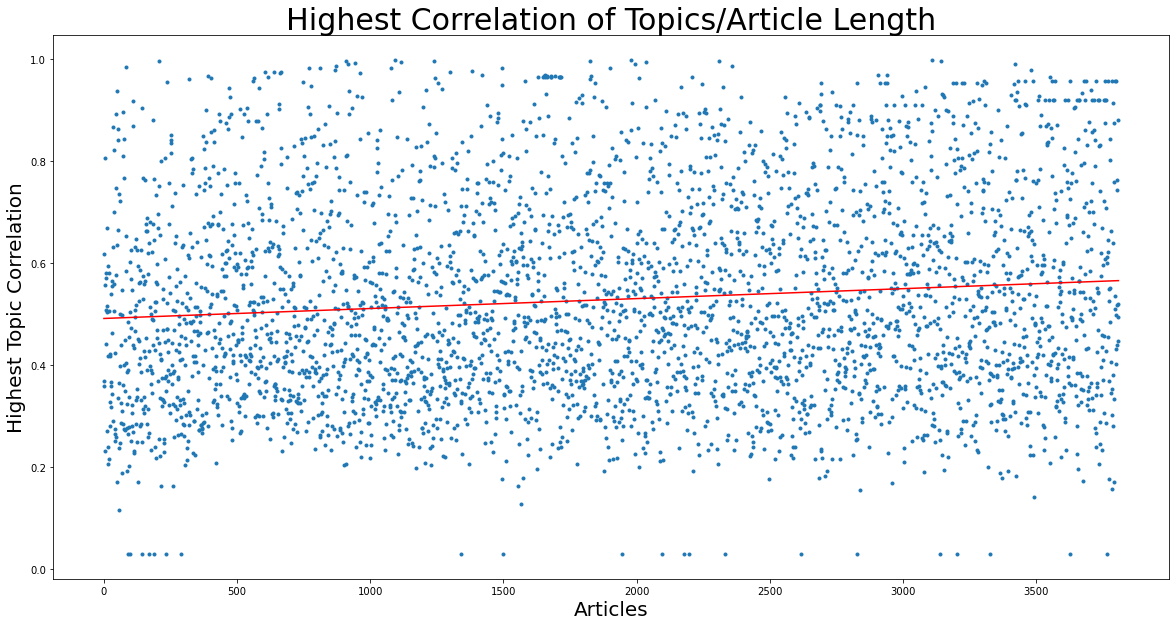

In [45]:
x = [tup[0] for tup in index_high_corr_list]
y = [tup[2] for tup in index_high_corr_list]

plt.figure(figsize=(20,10))
scatter = plt.plot(x,y, '.')
line = plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), 'r')
plt.title('Highest Correlation of Topics/Article Length', fontsize=30)
plt.xlabel("Articles", fontsize=20)
plt.ylabel("Highest Topic Correlation", fontsize=20)
plt.show(scatter, line)

## 주제별 시각화

In [64]:
# pyLDAvis 불러오기
import pyLDAvis
import pyLDAvis.gensim

# pyLDAvis를 jupyter notebook에서 실행할 수 있게 활성화.
pyLDAvis.enable_notebook()

# pyLDAvis 실행.
data = pyLDAvis.gensim.prepare(lda_model_final, corpus, dictionary)
data

/home/user_1/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
2      0.119998 -0.157385       1        1  5.964496
17     0.128775 -0.139784       2        1  5.374575
21    -0.169418 -0.021472       3        1  4.971362
18     0.090291 -0.161392       4        1  4.602679
29     0.099648 -0.052758       5        1  4.384493
14    -0.189618 -0.011969       6        1  4.297399
19     0.022061  0.159646       7        1  4.214212
10    -0.206707 -0.059706       8        1  4.028057
31     0.064314 -0.050156       9        1  3.765901
27     0.178302 -0.074741      10        1  3.679769
5      0.149671  0.177885      11        1  3.552377
32     0.137918  0.046745      12        1  3.441466
8      0.091743 -0.038655      13        1  3.391654
24    -0.199083  0.075286      14        1  3.318136
26     0.087457  0.121595      15        1  3.107827
12     0.083297  0.269794      16        1  2.957570
1     -0.082216 -0.134719      17        1  2.914600
30     0.112037 -0.037705      18        1  2.716943
20    -0.131274 -0.070486      19        1  2.635440
3     -0.057717  0.163695      20        1  2.518844
13     0.069669  0.110647      21        1  2.517085
25    -0.137097 -0.006094      22        1  2.408073
0      0.041777 -0.016423      23        1  2.118257
34     0.095969 -0.070126      24        1  2.068217
16     0.046902  0.002468      25        1  1.959518
15     0.103600 -0.053319      26        1  1.913420
6      0.136249 -0.008540      27        1  1.801460
4     -0.029402  0.138474      28        1  1.707146
9     -0.110547 -0.094827      29        1  1.635594
28    -0.125556 -0.066556      30        1  1.483201
23    -0.245071 -0.042929      31        1  1.326926
33     0.116609 -0.104895      32        1  1.316412
22    -0.148774  0.136502      33        1  0.889751
11     0.010740  0.127072      34        1  0.636479
7     -0.154546 -0.055172      35        1  0.380661, topic_info=    Term          Freq         Total Category  logprob  loglift
44    치료  18883.000000  18883.000000  Default  30.0000  30.0000
94    환자  15355.000000  15355.000000  Default  29.0000  29.0000
260   처방   6294.000000   6294.000000  Default  28.0000  28.0000
146   통증   7950.000000   7950.000000  Default  27.0000  27.0000
1     검사   6384.000000   6384.000000  Default  26.0000  26.0000
..   ...           ...           ...      ...      ...      ...
10    내용     28.040702   2992.130588  Topic35  -4.8883   0.9009
231   조직     22.371897   1483.010775  Topic35  -5.1142   1.3770
74    소개     21.951918   1311.878549  Topic35  -5.1331   1.4807
88    중요     22.826037   2527.435947  Topic35  -5.0941   0.8640
73    생각     24.102863   5225.046929  Topic35  -5.0396   0.1921

[2547 rows x 6 columns], token_table=       Topic      Freq Term
term                       
1544       7  0.084523   가감
1544      11  0.026894   가감
1544      14  0.069156   가감
1544      15  0.069156   가감
1544      16  0.230518   가감
...      ...       ...  ...
615        6  0.879301   힐링
13877      1  0.041762   힘줄
13877      2  0.786509   힘줄
13877     10  0.163566   힘줄
13877     23  0.003480   힘줄

[14040 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 18, 22, 19, 30, 15, 20, 11, 32, 28, 6, 33, 9, 25, 27, 13, 2, 31, 21, 4, 14, 26, 1, 35, 17, 16, 7, 5, 10, 29, 24, 34, 23, 12, 8])

# 5. Recommender

In [47]:
index = similarities.MatrixSimilarity(lda_model_final[corpus])
index[corpus_lda_model].shape

/home/user_1/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(3810, 3810)

In [54]:
# 원본
def book_recommender_all(title):
    books_checked = 0
    for i in range(len(df_des)):
        recommendation_scores = []
        # 넣은 타이틀이 동일할 경우
        if df_des.loc[i,'title'] == title:
            # i 번째 topic들 불러오기
            lda_vectors = corpus_lda_model[i]
            # 해당 토픽들간의 similar matrix 값
            sims = index[lda_vectors]
            sims = list(enumerate(sims))
#             print(sims)
            for sim in sims:
                book_num = sim[0]# enumerate index 값
                recommendation_score = [df_des.iloc[book_num,2], sim[1]]
                recommendation_scores.append(recommendation_score)
            
            recommendation = sorted(recommendation_scores, key=lambda x: x[1], reverse=True) # sim score 값에 따라 정렬
            print("Your book's most prominent tokens are:")
            article_tokens = corpus[i] # 해당 문서의 단어 토큰들
            sorted_tokens = sorted(article_tokens, key=lambda x: x[1], reverse=True) # 단어 토큰의 빈도로 정렬
            sorted_tokens_10 = sorted_tokens[:10]
            for i in range(len(sorted_tokens_10)):
                print("Word {} (\"{}\") appears {} time(s).".format(sorted_tokens_10[i][0], 
                                                             dictionary[sorted_tokens_10[i][0]], 
                                                             sorted_tokens_10[i][1]))
            print('-----')
            print("Your book's most prominant topic is:")
            print(lda_model_final.print_topic(max(lda_vectors, key=lambda item: item[1])[0]))
            print('-----')
            print('Here are your recommendations for "{}":'.format(title))
            display(recommendation[1:11])
        
        else:
            books_checked +=1
        
        # 만약 for문을 다돌았는데 못찾았을 경우
        if books_checked == len(df_des): 
            book_suggestions = []
            print('Sorry, but it looks like "{}" is not available.'.format(title))
#             other_books = []
#             for x in range(len(df_des)):
#                 other_book = df_des.iloc[x,2]
#                 book_silimarity = round(similar_books(other_book, title), 2)
#                 similarity_score = [other_book, book_silimarity]
#                 book_suggestions.append(similarity_score)

#             print('-----')
#             ordered_suggestions = sorted(book_suggestions, key=lambda x: x[1], reverse=True)
#             print('Were any of the following maybe what you were looking for?')
#             print(ordered_suggestions[:10])

/home/user_1/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [57]:
# 책추천 변경
def book_recommender_book(title):
    books_checked = 0
    for i in range(len(df_des)):
        recommendation_scores = []
        # 넣은 타이틀이 동일할 경우
        if df_des.loc[i,'title'] == title:
            # i 번째 topic들 불러오기
            lda_vectors = corpus_lda_model[i]
            # 해당 토픽들 모임에 해당하는 similar matrix 값
            sims = index[lda_vectors]
            sims = list(enumerate(sims))
            for sim in sims:
                book_num = sim[0]# enumerate index 값
                recommendation_score = [df_des.iloc[book_num,2], sim[1]]
                recommendation_scores.append(recommendation_score)
            
            recommendation_book = sorted(recommendation_scores[:373], key=lambda x: x[1], reverse=True) # sim score 값에 따라 정렬
            print("Your book's most prominent tokens are:")
            article_tokens = corpus[i] # 해당 문서의 단어 토큰들
            sorted_tokens = sorted(article_tokens, key=lambda x: x[1], reverse=True) # 단어 토큰의 빈도로 정렬
            sorted_tokens_10 = sorted_tokens[:10]
            for i in range(len(sorted_tokens_10)):
                print("Word {} (\"{}\") appears {} time(s).".format(sorted_tokens_10[i][0], 
                                                             dictionary[sorted_tokens_10[i][0]], 
                                                             sorted_tokens_10[i][1]))
            print('-----')
            print("Your book's most prominant topic is:")
            print(lda_model_final.print_topic(max(lda_vectors, key=lambda item: item[1])[0]))
            print('-----')
            print('Here are your recommendations for "{}":'.format(title))
            display(recommendation_book[1:11])
        
        else:
            books_checked +=1
        
        # 만약 for문을 다돌았는데 못찾았을 경우
        if books_checked == len(df_des): 
            book_suggestions = []
            print('Sorry, but it looks like "{}" is not available.'.format(title))
#             other_books = []
#             for x in range(len(df_des)):
#                 other_book = df_des.iloc[x,2]
#                 book_silimarity = round(similar_books(other_book, title), 2)
#                 similarity_score = [other_book, book_silimarity]
#                 book_suggestions.append(similarity_score)

#             print('-----')
#             ordered_suggestions = sorted(book_suggestions, key=lambda x: x[1], reverse=True)
#             print('Were any of the following maybe what you were looking for?')
            print(ordered_suggestions[:10])

/home/user_1/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [58]:
# 아티클 추천 변경
def book_recommender_article(title):
    books_checked = 0
    for i in range(len(df_des)):
        recommendation_scores = []
        # 넣은 타이틀이 동일할 경우
        if df_des.loc[i,'title'] == title:
            # i 번째 topic들 불러오기
            lda_vectors = corpus_lda_model[i]
            # 해당 토픽들 모임에 해당하는 similar matrix 값
            sims = index[lda_vectors]
            sims = list(enumerate(sims))
            for sim in sims:
                book_num = sim[0]# enumerate index 값
                recommendation_score = [df_des.iloc[book_num,2], sim[1]]
                recommendation_scores.append(recommendation_score)
            
            recommendation_book = sorted(recommendation_scores[372:], key=lambda x: x[1], reverse=True) # sim score 값에 따라 정렬
            print("Your book's most prominent tokens are:")
            article_tokens = corpus[i] # 해당 문서의 단어 토큰들
            sorted_tokens = sorted(article_tokens, key=lambda x: x[1], reverse=True) # 단어 토큰의 빈도로 정렬
            sorted_tokens_10 = sorted_tokens[:10]
            for i in range(len(sorted_tokens_10)):
                print("Word {} (\"{}\") appears {} time(s).".format(sorted_tokens_10[i][0], 
                                                             dictionary[sorted_tokens_10[i][0]], 
                                                             sorted_tokens_10[i][1]))
            print('-----')
            print("Your book's most prominant topic is:")
            print(lda_model_final.print_topic(max(lda_vectors, key=lambda item: item[1])[0]))
            print('-----')
            print('Here are your recommendations for "{}":'.format(title))
            display(recommendation_book[1:11])
        
        else:
            books_checked +=1
        
        # 만약 for문을 다돌았는데 못찾았을 경우
        if books_checked == len(df_des): 
            book_suggestions = []
            print('Sorry, but it looks like "{}" is not available.'.format(title))
#             other_books = []
#             for x in range(len(df_des)):
#                 other_book = df_des.iloc[x,2]
#                 book_silimarity = round(similar_books(other_book, title), 2)
#                 similarity_score = [other_book, book_silimarity]
#                 book_suggestions.append(similarity_score)

#             print('-----')
#             ordered_suggestions = sorted(book_suggestions, key=lambda x: x[1], reverse=True)
#             print('Were any of the following maybe what you were looking for?')
#             print(ordered_suggestions[:10])

/home/user_1/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [59]:
# 전체 추천
book_recommender_all("우리 아이 감기")

Your book's most prominent tokens are:
Word 54 ("감기") appears 27 time(s).
Word 75 ("소아") appears 12 time(s).
Word 80 ("원장") appears 11 time(s).
Word 44 ("치료") appears 10 time(s).
Word 36 ("진료") appears 9 time(s).
Word 63 ("기침") appears 9 time(s).
Word 76 ("아이") appears 9 time(s).
Word 229 ("자연") appears 8 time(s).
Word 1546 ("경과") appears 8 time(s).
Word 48 ("필요") appears 7 time(s).
-----
Your book's most prominant topic is:
0.118*"감기" + 0.074*"아이" + 0.047*"소아" + 0.038*"발열" + 0.029*"기침" + 0.022*"엄마" + 0.016*"의사" + 0.014*"진찰" + 0.013*"감염" + 0.013*"생각"
-----
Here are your recommendations for "우리 아이 감기":


/home/user_1/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['감기란 무엇인가? 왜 이견이 생길까?', 0.873597],
 ['감기의 정의', 0.8658875],
 ['HAPPY 소아청소년 진료', 0.83192766],
 ['감기의 자연경과', 0.8272891],
 ['소아 의료를 바꿔 나갑시다', 0.80871904],
 ['아이의 관점으로 보겠습니다', 0.80684197],
 ['감기와 항생제', 0.79034907],
 ['불명열을 줄이기 위한 외래 발열 진료가이드', 0.7342795],
 ['아빠가 들려주는 일차진료 소아과학', 0.7055628],
 ['열도 없고 콧물도 없는데 기침과 노란 가래가 있는 14년생 여아 처방을 어떤식으로 쓰면 좋을까요?', 0.7047521]]

In [60]:
# 책 -> 책 추천
book_recommender_book("우리 아이 감기")

Your book's most prominent tokens are:
Word 54 ("감기") appears 27 time(s).
Word 75 ("소아") appears 12 time(s).
Word 80 ("원장") appears 11 time(s).
Word 44 ("치료") appears 10 time(s).
Word 36 ("진료") appears 9 time(s).
Word 63 ("기침") appears 9 time(s).
Word 76 ("아이") appears 9 time(s).
Word 229 ("자연") appears 8 time(s).
Word 1546 ("경과") appears 8 time(s).
Word 48 ("필요") appears 7 time(s).
-----
Your book's most prominant topic is:
0.118*"감기" + 0.074*"아이" + 0.047*"소아" + 0.038*"발열" + 0.029*"기침" + 0.022*"엄마" + 0.016*"의사" + 0.014*"진찰" + 0.013*"감염" + 0.013*"생각"
-----
Here are your recommendations for "우리 아이 감기":


/home/user_1/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['HAPPY 소아청소년 진료', 0.83192825],
 ['불명열을 줄이기 위한 외래 발열 진료가이드', 0.734282],
 ['아빠가 들려주는 일차진료 소아과학', 0.7055624],
 ['열패혈증염증', 0.5989267],
 ['스마트 소아진료매뉴얼 절판 되었습니다.', 0.58149636],
 ['SMART 소아진료매뉴얼 3판', 0.57028407],
 ['평주온열경위', 0.54408956],
 ['소아피부질환해설', 0.5436375],
 ['비뇨기질환의 한방치료', 0.5433966],
 ['신종바이러스 감염증 예방과 치료를 위한 한방진료전략', 0.5327534]]

In [61]:
# 책 -> 아티클 추천
book_recommender_article("우리 아이 감기")

Your book's most prominent tokens are:
Word 54 ("감기") appears 27 time(s).
Word 75 ("소아") appears 12 time(s).
Word 80 ("원장") appears 11 time(s).
Word 44 ("치료") appears 10 time(s).
Word 36 ("진료") appears 9 time(s).
Word 63 ("기침") appears 9 time(s).
Word 76 ("아이") appears 9 time(s).
Word 229 ("자연") appears 8 time(s).
Word 1546 ("경과") appears 8 time(s).
Word 48 ("필요") appears 7 time(s).
-----
Your book's most prominant topic is:
0.118*"감기" + 0.074*"아이" + 0.047*"소아" + 0.038*"발열" + 0.029*"기침" + 0.022*"엄마" + 0.016*"의사" + 0.014*"진찰" + 0.013*"감염" + 0.013*"생각"
-----
Here are your recommendations for "우리 아이 감기":


/home/user_1/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['감기의 정의', 0.8658896],
 ['감기의 자연경과', 0.82729846],
 ['소아 의료를 바꿔 나갑시다', 0.8087144],
 ['아이의 관점으로 보겠습니다', 0.8068432],
 ['감기와 항생제', 0.79034966],
 ['열도 없고 콧물도 없는데 기침과 노란 가래가 있는 14년생 여아 처방을 어떤식으로 쓰면 좋을까요?', 0.70475274],
 ['[신향화의 핵심 소아과 상식] 0. 프롤로그 - 한의사에게 소아과 지식이 필요한 이유', 0.6784098],
 ['보수교육 초과평점 다음해에 쓸 수 있나요?', 0.6601337],
 ['수유 중인 산무에게서 유두 짓무름이 발생하면 어떻게 치료해야 할까?', 0.64552534],
 ['영유아 아토피 이유식을 어떻게 안내해야 할까요?', 0.6317518]]

In [ ]:
###########################################################################################################

In [ ]:
# !pip install pyldavis==3.2.1